<a href="https://colab.research.google.com/github/Ami190/Densenet_CIFAR/blob/master/_final_EIP2_MNISTAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
seed = 128
np.random.RandomState(seed)
import math
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.optimizers import SGD,Adam
from keras import backend as K
from keras.callbacks import LearningRateScheduler

In [3]:
(raw_train_data, raw_train_labels), (raw_test_data, raw_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [5]:
# 60000 training images with 28x28 pixels
print(np.shape(raw_train_data))
# 60000 labels
print(np.shape(raw_train_labels))
 
# 10000 test images with 28x28 pixels
print(np.shape(raw_test_data))
# 10000 labels
print(np.shape(raw_test_labels))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
# input image dimensions
img_rows, img_cols = 28, 28
# normalizing
if K.image_data_format() == 'channels_first':
    raw_train_data = raw_train_data.reshape(raw_train_data.shape[0], 1, img_rows, img_cols)
    raw_train_data = raw_train_data.reshape(raw_train_data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    raw_train_data = raw_train_data.reshape(raw_train_data.shape[0], img_rows, img_cols, 1)
    raw_train_data = raw_train_data.reshape(raw_train_data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
test_data = np.asarray(raw_test_data / 255.0 , dtype=float)
train_data = np.asarray(raw_train_data / 255.0 , dtype=float)
test_labels= np.asarray(raw_test_labels , dtype=np.int32)
train_labels = np.asarray(raw_train_labels , dtype=np.int32)


In [0]:
def plot_images(imgs, labels=None, rows=1, figsize=(20,8), fontsize=14):
    figure = plt.figure(figsize=figsize)
    cols = max(1,len(imgs) // rows-1)
    labels_present = False
    # checking if labels is a numpy array
    if type(labels).__module__ == np.__name__:
        labels_present=labels.any()
    elif labels:
        labels_present=True
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols+1, i+1)
        # axis off, but leave a bounding box
        plt.tick_params(
            axis='both',
            which='both',
            bottom='off',
            top='off',
            left='off',
            right='off',
            labelbottom='off',
            labelleft='off')
        # plot labels if present
        if labels_present:
            subplot.set_title(labels[i], fontsize=fontsize)
        plt.imshow(imgs[i][:,:,0], cmap='Greys')
        
    plt.show()

(100, 28, 28, 1)
(10, 10, 10)


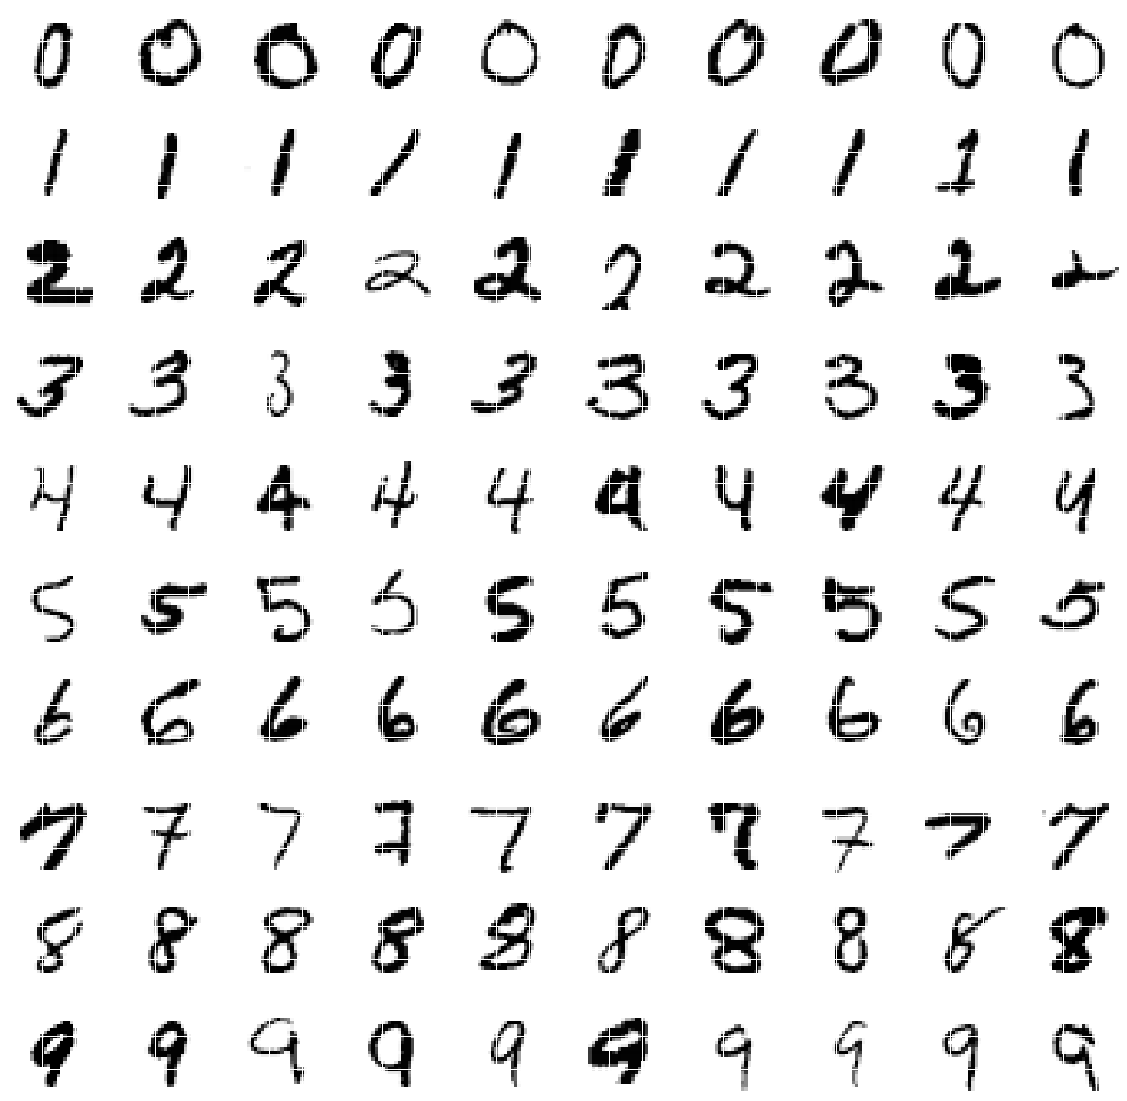

In [8]:
# Extract n random samples of each class from the dataset
def get_random_sample(number_of_samples=10):
    x = []
    y = []
    for category_number in range(0,10):
        # get all samples of a category
        train_data_category = train_data[train_labels==category_number]
        # pick a number of random samples from the category
        train_data_category = train_data_category[np.random.randint(train_data_category.shape[0], 
                                                                    size=number_of_samples), :]
        x.extend(train_data_category)
        y.append([category_number]*number_of_samples)
    
    return np.asarray(x).reshape(-1, 28, 28, 1), y
   
x_ten_samples, y_ten_samples = get_random_sample(number_of_samples=10)
 
y_ten_samples = np_utils.to_categorical(y_ten_samples)
    
print(np.shape(x_ten_samples))
print(np.shape(y_ten_samples))
plot_images(x_ten_samples[0:100], rows=10, figsize=(20,20))

In [9]:
from keras.layers.normalization import BatchNormalization
def getModel():
    model = Sequential() 
    model.add(Conv2D(filters = 32, kernel_size = (3, 3),kernel_regularizer=regularizers.l2(0.0001), activation='relu',
                 input_shape = (28, 28, 1)))  
    BatchNormalization(axis=1)
    model.add(MaxPool2D())
    model.add(Dropout(0.50))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), kernel_regularizer=regularizers.l2(0.0001),activation='relu'))
    model.add(MaxPool2D(strides=(2,2)))
   # BatchNormalization(axis=1)
    model.add(Conv2D(filters = 32, kernel_size = (3, 3),kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
    
   # model.add(Conv2D(10, 3))
    model.add(MaxPool2D())
   # model.add(Dropout(0.25))
    model.add(Conv2D(10,1)  ) 
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model
print(getModel().summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
__________

In [10]:
# reshape the images to 4D tensors
x_train_data = train_data.reshape(-1, 28, 28, 1)
y_train_data = np_utils.to_categorical(train_labels)
 
print(np.shape(x_train_data))
print(np.shape(y_train_data))
 
x_test_data = test_data.reshape(-1, 28, 28, 1)
y_test_data = np_utils.to_categorical(test_labels)
print(np.shape(x_test_data))
print(np.shape(y_test_data))

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [0]:
number_of_epochs =50
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

In [16]:
model_original_data = getModel()
SGD = keras.optimizers.SGD(lr=0.90,momentum = 0.1, decay = 0.0 , nesterov = False)
model_original_data.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(lr=1e-4), metrics=['accuracy'])
model_original_data.fit(x_train_data, y_train_data,validation_split=0.23,epochs=50, batch_size = 16,verbose=1,callbacks=[annealer])

Train on 46200 samples, validate on 13800 samples
Epoch 1/50
46200/46200 [==============================] - 26s 557us/step - loss: 0.3612 - acc: 0.8907 - val_loss: 0.1513 - val_acc: 0.9589
Epoch 2/50
46200/46200 [==============================] - 26s 554us/step - loss: 0.1548 - acc: 0.9574 - val_loss: 0.1241 - val_acc: 0.9667
Epoch 3/50
46200/46200 [==============================] - 25s 551us/step - loss: 0.1255 - acc: 0.9671 - val_loss: 0.0982 - val_acc: 0.9778
Epoch 4/50
46200/46200 [==============================] - 25s 547us/step - loss: 0.1116 - acc: 0.9719 - val_loss: 0.0941 - val_acc: 0.9763
Epoch 5/50
46200/46200 [==============================] - 25s 549us/step - loss: 0.1019 - acc: 0.9749 - val_loss: 0.0988 - val_acc: 0.9772
Epoch 6/50
46200/46200 [==============================] - 26s 554us/step - loss: 0.0932 - acc: 0.9774 - val_loss: 0.0893 - val_acc: 0.9785
Epoch 7/50
46200/46200 [==============================] - 26s 556us/step - loss: 0.0880 - acc: 0.9789 - val_loss: 0.

In [17]:
model_original_data.fit(x_train_data, y_train_data,validation_split=0.23,epochs=50, batch_size = 16,verbose=1,callbacks=[annealer])

Train on 46200 samples, validate on 13800 samples
Epoch 1/50
46200/46200 [==============================] - 28s 598us/step - loss: 0.0873 - acc: 0.9794 - val_loss: 0.0746 - val_acc: 0.9849
Epoch 2/50
46200/46200 [==============================] - 28s 600us/step - loss: 0.0829 - acc: 0.9815 - val_loss: 0.0895 - val_acc: 0.9814
Epoch 3/50
46200/46200 [==============================] - 28s 602us/step - loss: 0.0793 - acc: 0.9828 - val_loss: 0.0725 - val_acc: 0.9860
Epoch 4/50
46200/46200 [==============================] - 28s 601us/step - loss: 0.0761 - acc: 0.9842 - val_loss: 0.0737 - val_acc: 0.9862
Epoch 5/50
46200/46200 [==============================] - 28s 602us/step - loss: 0.0731 - acc: 0.9851 - val_loss: 0.0772 - val_acc: 0.9844
Epoch 6/50
46200/46200 [==============================] - 28s 602us/step - loss: 0.0686 - acc: 0.9860 - val_loss: 0.0748 - val_acc: 0.9859
Epoch 7/50
46200/46200 [==============================] - 29s 630us/step - loss: 0.0663 - acc: 0.9870 - val_loss: 0.

In [18]:
model_original_data.fit(x_train_data, y_train_data,validation_split=0.23,epochs=30, batch_size = 16,verbose=1,callbacks=[annealer])

Train on 46200 samples, validate on 13800 samples
Epoch 1/30
46200/46200 [==============================] - 30s 646us/step - loss: 0.0758 - acc: 0.9826 - val_loss: 0.0957 - val_acc: 0.9788
Epoch 2/30
46200/46200 [==============================] - 29s 638us/step - loss: 0.0728 - acc: 0.9848 - val_loss: 0.0875 - val_acc: 0.9810
Epoch 3/30
46200/46200 [==============================] - 29s 637us/step - loss: 0.0701 - acc: 0.9858 - val_loss: 0.0747 - val_acc: 0.9863
Epoch 4/30
46200/46200 [==============================] - 30s 653us/step - loss: 0.0664 - acc: 0.9872 - val_loss: 0.0716 - val_acc: 0.9872
Epoch 5/30
46200/46200 [==============================] - 29s 624us/step - loss: 0.0655 - acc: 0.9873 - val_loss: 0.0719 - val_acc: 0.9870
Epoch 6/30
46200/46200 [==============================] - 30s 640us/step - loss: 0.0633 - acc: 0.9880 - val_loss: 0.0729 - val_acc: 0.9866
Epoch 7/30
46200/46200 [==============================] - 30s 640us/step - loss: 0.0617 - acc: 0.9881 - val_loss: 0.

In [20]:
model_original_data.fit(x_train_data, y_train_data,validation_split=0.30,epochs=30, batch_size = 16,verbose=1,callbacks=[annealer])

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 25s 601us/step - loss: 0.0702 - acc: 0.9852 - val_loss: 0.0702 - val_acc: 0.9862
Epoch 2/30
42000/42000 [==============================] - 25s 592us/step - loss: 0.0687 - acc: 0.9857 - val_loss: 0.0713 - val_acc: 0.9865
Epoch 3/30
42000/42000 [==============================] - 26s 630us/step - loss: 0.0674 - acc: 0.9870 - val_loss: 0.0687 - val_acc: 0.9882
Epoch 4/30
42000/42000 [==============================] - 27s 633us/step - loss: 0.0669 - acc: 0.9865 - val_loss: 0.0781 - val_acc: 0.9847
Epoch 5/30
42000/42000 [==============================] - 27s 637us/step - loss: 0.0620 - acc: 0.9885 - val_loss: 0.0710 - val_acc: 0.9871
Epoch 6/30
42000/42000 [==============================] - 26s 623us/step - loss: 0.0598 - acc: 0.9892 - val_loss: 0.0673 - val_acc: 0.9886
Epoch 7/30
42000/42000 [==============================] - 26s 617us/step - loss: 0.0568 - acc: 0.9892 - val_loss: 0.

In [21]:
model_original_data.fit(x_train_data, y_train_data,validation_split=0.13,epochs=30, batch_size = 16,verbose=1,callbacks=[annealer])

Train on 52200 samples, validate on 7800 samples
Epoch 1/30
52200/52200 [==============================] - 30s 580us/step - loss: 0.0734 - acc: 0.9846 - val_loss: 0.0804 - val_acc: 0.9836
Epoch 2/30
52200/52200 [==============================] - 30s 572us/step - loss: 0.0707 - acc: 0.9851 - val_loss: 0.0704 - val_acc: 0.9867
Epoch 3/30
52200/52200 [==============================] - 32s 605us/step - loss: 0.0696 - acc: 0.9857 - val_loss: 0.0738 - val_acc: 0.9864
Epoch 4/30
52200/52200 [==============================] - 30s 572us/step - loss: 0.0662 - acc: 0.9872 - val_loss: 0.0697 - val_acc: 0.9868
Epoch 5/30
52200/52200 [==============================] - 30s 572us/step - loss: 0.0628 - acc: 0.9880 - val_loss: 0.0698 - val_acc: 0.9882
Epoch 6/30
52200/52200 [==============================] - 31s 588us/step - loss: 0.0621 - acc: 0.9881 - val_loss: 0.0664 - val_acc: 0.9890
Epoch 7/30
52200/52200 [==============================] - 31s 591us/step - loss: 0.0599 - acc: 0.9887 - val_loss: 0.0

In [22]:
model_original_data.fit(x_train_data, y_train_data,validation_split=0.30,epochs=50, batch_size = 8,verbose=1,callbacks=[annealer])

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 52s 1ms/step - loss: 0.0848 - acc: 0.9802 - val_loss: 0.0680 - val_acc: 0.9869
Epoch 2/50
42000/42000 [==============================] - 52s 1ms/step - loss: 0.0792 - acc: 0.9830 - val_loss: 0.0726 - val_acc: 0.9862
Epoch 3/50
42000/42000 [==============================] - 52s 1ms/step - loss: 0.0780 - acc: 0.9840 - val_loss: 0.0734 - val_acc: 0.9864
Epoch 4/50
42000/42000 [==============================] - 53s 1ms/step - loss: 0.0760 - acc: 0.9856 - val_loss: 0.0712 - val_acc: 0.9878
Epoch 5/50
42000/42000 [==============================] - 53s 1ms/step - loss: 0.0719 - acc: 0.9862 - val_loss: 0.0768 - val_acc: 0.9851
Epoch 6/50
42000/42000 [==============================] - 53s 1ms/step - loss: 0.0682 - acc: 0.9869 - val_loss: 0.0684 - val_acc: 0.9884
Epoch 7/50
42000/42000 [==============================] - 53s 1ms/step - loss: 0.0653 - acc: 0.9876 - val_loss: 0.0712 - val_acc

In [23]:
score = model_original_data.evaluate(x_test_data,y_test_data,verbose=1)
print(score)

10000/10000 [==============================] - 1s 104us/step
[0.05662910980582237, 0.99]


In [24]:
y_pred=model_original_data.predict(x_test_data)
print(y_pred[:9])
print(y_test_data[:9])

[[1.14393551e-07 5.12310692e-07 8.33492140e-06 6.77823391e-06
  9.69295755e-10 2.54496406e-08 2.14693174e-09 9.99950886e-01
  1.97826591e-08 3.33703174e-05]
 [6.05607738e-07 5.70767544e-10 9.99999404e-01 5.01572284e-10
  1.10492890e-14 2.54642858e-15 1.86262436e-10 5.34308287e-09
  1.17972937e-10 1.54447988e-09]
 [7.42641168e-06 9.99808252e-01 2.44539979e-06 2.46631316e-07
  1.06261272e-04 2.44314788e-06 1.88413323e-05 4.22674530e-05
  1.05487079e-05 1.21512596e-06]
 [9.99989748e-01 2.75117720e-15 6.33476427e-09 1.48104473e-14
  1.07419879e-10 3.63436975e-10 4.34866388e-06 8.26068813e-09
  1.62089702e-08 5.86204487e-06]
 [9.34722135e-13 8.41678344e-14 3.85604005e-12 5.11185807e-14
  9.99997377e-01 2.89833491e-10 2.16317537e-11 3.77846893e-10
  1.83024651e-09 2.60420529e-06]
 [1.16181229e-06 9.99931216e-01 3.56392576e-07 1.11175723e-07
  3.79226767e-05 1.12116524e-07 1.87335684e-06 2.18636651e-05
  4.19845173e-06 1.14134298e-06]
 [2.25318184e-11 4.56043781e-09 9.93285575e-12 4.14943579e

In [42]:
from keras.preprocessing.image import ImageDataGenerator
# model_original_data.optimizer.lr=0.01
# gen =ImageDataGenerator()
# batches = gen.flow(x_train_data, x_train_data, batch_size=64)
# history=model_original_data.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3)
datagen = ImageDataGenerator(zoom_range = 0.1,zca_whitening=True,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

model_augmented=getModel()
adam = keras.optimizers.adam(lr=0.0001)
model_augmented.compile(loss='categorical_crossentropy', optimizer = adam, metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:645: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [43]:
hist = model_augmented.fit_generator(datagen.flow(x_train_data, y_train_data, batch_size=16),
                           
                           epochs=50, 
                           verbose=1,callbacks=[annealer])


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:799: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:817: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


3750/3750 [==============================] - 53s 14ms/step - loss: 0.5590 - acc: 0.8237
Epoch 2/50
3750/3750 [==============================] - 53s 14ms/step - loss: 0.2751 - acc: 0.9204
Epoch 3/50
3750/3750 [==============================] - 51s 14ms/step - loss: 0.2295 - acc: 0.9364
Epoch 4/50
3750/3750 [==============================] - 53s 14ms/step - loss: 0.2056 - acc: 0.9456
Epoch 5/50
3750/3750 [==============================] - 51s 14ms/step - loss: 0.1911 - acc: 0.9496
Epoch 6/50
3750/3750 [==============================] - 52s 14ms/step - loss: 0.1835 - acc: 0.9525
Epoch 7/50
3750/3750 [==============================] - 52s 14ms/step - loss: 0.1754 - acc: 0.9534
Epoch 8/50
3750/3750 [==============================] - 53s 14ms/step - loss: 0.1666 - acc: 0.9574
Epoch 9/50
3750/3750 [==============================] - 52s 14ms/step - loss: 0.1637 - acc: 0.9588
Epoch 10/50
3750/3750 [==============================] - 51s 14ms/step - loss: 0.1568 - acc: 0.9605
Epoch 11/50
3750/375

In [0]:
hist = model_augmented.fit_generator(datagen.flow(x_train_data, y_train_data, batch_size=16),
                           epochs=50, 
                           verbose=1,callbacks=[annealer])


Epoch 1/50
3750/3750 [==============================] - 48s 13ms/step - loss: 0.2559 - acc: 0.9245
Epoch 2/50
3750/3750 [==============================] - 47s 13ms/step - loss: 0.2215 - acc: 0.9378
Epoch 3/50
3750/3750 [==============================] - 47s 12ms/step - loss: 0.2012 - acc: 0.9474
Epoch 4/50
3750/3750 [==============================] - 47s 13ms/step - loss: 0.1893 - acc: 0.9501
Epoch 5/50
3750/3750 [==============================] - 47s 12ms/step - loss: 0.1800 - acc: 0.9534
Epoch 6/50
3750/3750 [==============================] - 47s 12ms/step - loss: 0.1730 - acc: 0.9561
Epoch 7/50
3750/3750 [==============================] - 48s 13ms/step - loss: 0.1690 - acc: 0.9572
Epoch 8/50
3750/3750 [==============================] - 47s 12ms/step - loss: 0.1642 - acc: 0.9577
Epoch 9/50
3750/3750 [==============================] - 47s 12ms/step - loss: 0.1597 - acc: 0.9593
Epoch 10/50
3750/3750 [==============================] - 47s 13ms/step - loss: 0.1542 - acc: 0.9614
Epoch 11/

In [44]:
hist = model_augmented.fit_generator(datagen.flow(x_train_data, y_train_data, batch_size=16),
                           epochs=50, 
                           verbose=1,callbacks=[annealer])


Epoch 1/50
  11/3750 [..............................] - ETA: 1:03 - loss: 0.0891 - acc: 0.9716

/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:799: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:817: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


3750/3750 [==============================] - 55s 15ms/step - loss: 0.1639 - acc: 0.9579
Epoch 2/50
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1629 - acc: 0.9590
Epoch 3/50
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1615 - acc: 0.9598
Epoch 4/50
3750/3750 [==============================] - 54s 15ms/step - loss: 0.1542 - acc: 0.9628
Epoch 5/50
3750/3750 [==============================] - 56s 15ms/step - loss: 0.1551 - acc: 0.9632
Epoch 6/50
3750/3750 [==============================] - 57s 15ms/step - loss: 0.1485 - acc: 0.9645
Epoch 7/50
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1456 - acc: 0.9650
Epoch 8/50
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1393 - acc: 0.9666
Epoch 9/50
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1401 - acc: 0.9662
Epoch 10/50
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1368 - acc: 0.9679
Epoch 11/50
3750/375

In [46]:
score = model_augmented.evaluate(x_test_data,y_test_data,verbose=1)
print(score)

10000/10000 [==============================] - 1s 129us/step
[0.05883759761452675, 0.9908]


In [47]:
y_pred=model_original_data.predict(x_test_data)
print(y_pred[:9])
print(y_test_data[:9])

[[1.14393551e-07 5.12310692e-07 8.33492140e-06 6.77823391e-06
  9.69295755e-10 2.54496406e-08 2.14693174e-09 9.99950886e-01
  1.97826591e-08 3.33703174e-05]
 [6.05607738e-07 5.70767544e-10 9.99999404e-01 5.01572284e-10
  1.10492890e-14 2.54642858e-15 1.86262436e-10 5.34308287e-09
  1.17972937e-10 1.54447988e-09]
 [7.42641168e-06 9.99808252e-01 2.44539979e-06 2.46631316e-07
  1.06261272e-04 2.44314788e-06 1.88413323e-05 4.22674530e-05
  1.05487079e-05 1.21512596e-06]
 [9.99989748e-01 2.75117720e-15 6.33476427e-09 1.48104473e-14
  1.07419879e-10 3.63436975e-10 4.34866388e-06 8.26068813e-09
  1.62089702e-08 5.86204487e-06]
 [9.34722135e-13 8.41678344e-14 3.85604005e-12 5.11185807e-14
  9.99997377e-01 2.89833491e-10 2.16317537e-11 3.77846893e-10
  1.83024651e-09 2.60420529e-06]
 [1.16181229e-06 9.99931216e-01 3.56392576e-07 1.11175723e-07
  3.79226767e-05 1.12116524e-07 1.87335684e-06 2.18636651e-05
  4.19845173e-06 1.14134298e-06]
 [2.25318184e-11 4.56043781e-09 9.93285575e-12 4.14943579e

**Test Accuracy without Augmentation : 99 %**

**Test Accuracy After Augmentation : 99.08%**

**Total Params: 19,146 **